# Building a Problem Solving Agent

In this assignment, I have built an agent that solves problems by searching through a graph (state space) for the solution.<br>
I have used four searching algorithms for this purpose.
* Breadth First Search
* Depth First Search
* Greedy Best First Search
* A* Search

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
process = lambda column: column.str.replace(' ', '').str.capitalize()

Reading in the dataset containing cities and pairwise distance

In [3]:
data_df = pd.read_csv("Cities_Distances.csv", header=None)
data_df.columns = ["City_1", "City_2", "travel_dist", "straight_dist"]
data_df.City_1 = process(data_df.City_1)
data_df.City_2 = process(data_df.City_2)
data_df.head()

,City_1,City_2,travel_dist,straight_dist
0,Agartala,Aizawl,342,146
1,Aizawl,Imphal,400,173
2,Amaravathi,Bangalore,663,498
3,Amaravathi,Chennai,448,391
4,Amaravathi,Bhubaneswar,819,715


Reading the dataset containing the heuristic distances from other cities to Bangalore

In [4]:
bangalore_heuristics = pd.read_csv('heuristics_bangalore.csv', header=0)
bangalore_heuristics.columns = ['City_1', 'City_2', 'Distance']
bangalore_heuristics.City_1 = process(bangalore_heuristics.City_1)
bangalore_heuristics.City_2 = process(bangalore_heuristics.City_2)
bangalore_heuristics.set_index(['City_1', 'City_2'], inplace=True)

Drawing the cities and the edges connecting them

c:\users\sravan vinakota\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


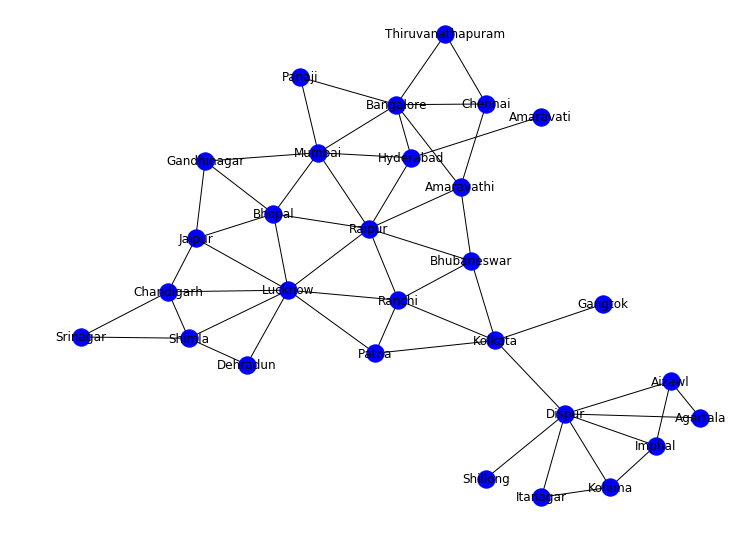

In [5]:
map_ = nx.Graph()

for row in data_df.set_index(['City_1', 'City_2']).iterrows():
    map_.add_edge(*row[0], **row[1])

fig = plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
nx.draw(map_, with_labels=True, pos=nx.kamada_kawai_layout(map_), node_color='blue')

###### Making a class(problem solving agent) that contains the function for heuristics and other helper functions

Class for the taxi agent

In [6]:
class Taxiagent:
    def __init__(self, init_state, final_state, space, heuristics):
#         Parameters:
#             init_state: the initial state of the agent
#             final_state: the goal state of the agent
#             space: the space of the taxi agent
#             heuristics: the heuristics graph or function
#         Returns:
#             the taxiagent object

        self.init_state = init_state
        self.final_state = final_state
        self.space = space
        self.heuristics = heuristics
    
    def heuristic_fn(self, n):
        return self.heuristics['Distance'][(n, self.final_state)]
    
    def g_n(self, n1, n2):
        for edge in self.space.edges(data=True):
            if n1 in edge and n2 in edge:
                return edge[-1]['straight_dist']
    
    def action_fn(self, current_state, with_heuristics=False):
#         Parameters:
#             current_state: the current_state of the problem
#         Returns:
#             the list of neighbors of the current state
        
        neighbors = list(nx.Graph.neighbors(self.space, current_state))
#         print(f'Neighbors: {neighbors}')
        if with_heuristics:
            h_n = [self.heuristic_fn(n) for n in neighbors]
            return list(zip(neighbors, h_n))
        else:
            return neighbors

Class for the Eight Puzzle agent

In [7]:
class EightPuzzle:
    def __init__(self, init_state, final_state, heuristics=None, size=3):
#         Parameters:
#             init_state: the initial state of the agent
#             final_state: the goal state of the agent
#             heuristics: the heuristics graph or function
#         Returns:
#             the taxiagent object
        self.init_state = self.MTL(np.array(init_state))
        self.final_state = self.MTL(np.array(final_state))
        self.heuristics = heuristics
        self.size = size

    def heuristic_fn(self, n):
        reshaped_final = self.LTM(self.final_state)
        reshaped_curr = self.LTM(n)
        
        total = 0
        for i in range(self.size ** 2):
            curr_pos = (np.where(reshaped_curr == i)[0][0], np.where(reshaped_curr == i)[1][0])
            final_pos = (np.where(reshaped_final == i)[0][0], np.where(reshaped_final == i)[1][0])
            
            total += abs(curr_pos[0] - final_pos[0]) + abs(curr_pos[1] - final_pos[1])
        
        return total
    
    def g_n(self, n1, n2):
        return 1 # edge cost is assumed to be 1 in this case
    
    def action_fn(self, current_state, with_heuristics=False):
#         Parameters:
#             current_state: the current_state of the problem
#         Returns:
#             the list of neighbors of the current state
        reshaped_curr = self.LTM(current_state)
        pos_0 = (np.where(reshaped_curr == 0)[0][0], np.where(reshaped_curr == 0)[1][0])
        
        neighbors = []
        # check position of empty and apply up, down, left, right
        if pos_0[0] != 0: # going up
            n = np.copy(reshaped_curr)
            temp = n[pos_0[0] - 1][pos_0[1]]
            n[pos_0[0] - 1][pos_0[1]] = 0
            n[pos_0[0]][pos_0[1]] = temp
            neighbors.append(self.MTL(n))
        
        if pos_0[0] != self.size - 1: # going down
            n = np.copy(reshaped_curr)
            temp = n[pos_0[0] + 1][pos_0[1]]
            n[pos_0[0] + 1][pos_0[1]] = 0
            n[pos_0[0]][pos_0[1]] = temp
            neighbors.append(self.MTL(n))
        
        if pos_0[1] != 0: # going left
            n = np.copy(reshaped_curr)
            temp = n[pos_0[0]][pos_0[1] - 1]
            n[pos_0[0]][pos_0[1] - 1] = 0
            n[pos_0[0]][pos_0[1]] = temp
            neighbors.append(self.MTL(n))
        
        if pos_0[1] != self.size - 1: # going right
            n = np.copy(reshaped_curr)
            temp = n[pos_0[0]][pos_0[1] + 1]
            n[pos_0[0]][pos_0[1] + 1] = 0
            n[pos_0[0]][pos_0[1]] = temp
            neighbors.append(self.MTL(n))
        
        if with_heuristics:
            h_s = [self.heuristic_fn(i) for i in neighbors]
            return list(zip(neighbors, h_s))
        else:
            return neighbors
    
    def LTM(self, state):
        return np.reshape(list(map(int, state)), (self.size, self.size))
    
    def MTL(self, state):
        return ''.join(map(str, state.flatten()))

##### The four search algortihms

In [8]:
def BFS(agent):
#     Parameters:
#         agent: the problem solving agent
#     Returns:
#         path: the sequence of actions
    
    parent = None # memory of parent
    frontier = [(agent.init_state, parent)] # discovered but not yet explored
    explored = [] # explored
    found = False # flag to determine if path exists or not
    
    while frontier:
        current, parent = frontier.pop(0)
        explored.append((current, parent))
        if current == agent.final_state:
            found = True # set the flag to True if the goal state has been found
            break
        
        # function to filter out neighbors that have already been explored
        check_not_visited = lambda x: x not in list(map(lambda x: x[0], explored)) and x not in list(map(lambda x: x[0], frontier))
        new_neighbors = agent.action_fn(current) # get the neighbors of the current state
        non_visited_neighbors = list(filter(check_not_visited, new_neighbors)) # apply the check_not_visited function on the set of new neighbors
        new_nodes = list(zip(non_visited_neighbors, [current] * len(new_neighbors))) # group the filtered out neighbors with their parent to append to the frontier
        frontier.extend(new_nodes)
    
    if found:
        path = []
        state = agent.final_state
        
        while state: # loop through the explored set to get the path to the final state
            path.append(state)
            state = tuple(filter(lambda x: x[0] == state, explored))[0][1]
        
        return True, list(reversed(path))
    return False, None

In [9]:
def DFS(agent):
#     Parameters:
#         agent: the problem solving agent
#     Returns:
#         path: the sequence of actions
    
    parent = None # memory of parent
    frontier = [(agent.init_state, parent)] # discovered but not yet explored
    explored = [] # explored
    found = False # flag to determine if path exists or not
    
    while frontier:
        current, parent = frontier.pop(-1)
        explored.append((current, parent))
        if current == agent.final_state:
            found = True # set the flag to True if the goal state has been found
            break
        
        # function to filter out neighbors that have already been explored
        check_not_visited = lambda x: x not in list(map(lambda x: x[0], explored)) and x not in list(map(lambda x: x[0], frontier))
        new_neighbors = agent.action_fn(current) # get the neighbors of the current state
        non_visited_neighbors = list(filter(check_not_visited, new_neighbors)) # apply the check_not_visited function on the set of new neighbors
        new_nodes = list(zip(non_visited_neighbors, [current] * len(new_neighbors))) # group the filtered out neighbors with their parent to append to the frontier
        frontier.extend(new_nodes)
    
    if found:
        path = []
        state = agent.final_state
        
        while state: # loop through the explored set to get the path to the final state
            path.append(state)
            state = tuple(filter(lambda x: x[0] == state, explored))[0][1]
        
        return True, list(reversed(path))
    return False, None

In [10]:
def GBFS(agent):
#     Parameters:
#         agent: the problem solving agent
#     Returns:
#         path: the sequence of actions
    
    initial_cost = agent.heuristic_fn(agent.init_state)
    parent = None # memory of parent
    frontier = [(agent.init_state, parent, initial_cost)] # discovered but not yet explored
    explored = [] # explored
    found = False # flag to determine if path found or not
    
    while frontier:
        frontier = sorted(frontier, key=lambda x: x[-1])
        current, parent, cost = frontier.pop(0)
        explored.append((current, parent, cost))
#         print(f'Explored: {explored}')
        if current == agent.final_state:
            found = True # set the flag to True if the goal state has been found
            break
        
        # function to filter out neighbors that have already been explored
        check_not_visited = lambda x: x[0] not in list(map(lambda x: x[0], explored)) and x[0] not in list(map(lambda x: x[0], frontier))
        new_neighbors = agent.action_fn(current, True) # get the neighbors of the current state
        non_visited_neighbors = list(filter(check_not_visited, new_neighbors)) # apply the check_not_visited function on the set of new neighbors
        new_nodes = list(zip(map(lambda x: x[0], non_visited_neighbors), [current] * len(new_neighbors), map(lambda x: x[-1], non_visited_neighbors)))
        # group the filtered out neighbors with their parent to append to the frontier
#         print(f'New Nodes: {new_nodes}')
        frontier.extend(new_nodes)
    
    if found:
        path = []
        state = agent.final_state
        
        while state: # loop through the explored set to get the path to the final state
            path.append(state)
            state = tuple(filter(lambda x: x[0] == state, explored))[0][1]
        
        return True, list(reversed(path))
    return False, None

In [11]:
def A_star(agent):
#     Parameters:
#         agent: the problem solving agent
#     Returns:
#         path: the sequence of actions
    
    initial_cost = agent.heuristic_fn(agent.init_state)
    parent = None # memory of parent
    frontier = [(agent.init_state, parent, initial_cost)] # discovered but not yet explored
    explored = [] # explored
    found = False # flag to determine if path found or not
    
    while frontier:
        frontier = sorted(frontier, key=lambda x: x[-1])
        current, parent, cost = frontier.pop(0)
        explored.append((current, parent, cost))
#         print(f'Explored: {explored}')
        if current == agent.final_state:
            found = True # set the flag to True if the goal state has been found
            break
        
        # function to filter out neighbors that have already been explored
        check_not_visited = lambda x: x[0] not in list(map(lambda x: x[0], explored))
        new_neighbors = agent.action_fn(current, True) # get the neighbors of the current state
        non_visited_neighbors = list(filter(check_not_visited, new_neighbors)) # apply the check_not_visited function on the set of new neighbors
        new_nodes = list(zip(map(lambda x: x[0], non_visited_neighbors), [current] * len(new_neighbors), map(lambda x: cost - agent.heuristic_fn(current) + agent.g_n(current, x[0]) + x[-1], non_visited_neighbors)))
        # group the filtered out neighbors with their parent to append to the frontier
#         print(f'New Nodes: {new_nodes}')
        frontier.extend(new_nodes)
    
    if found:
        path = []
        state = agent.final_state
        
        while state:
            path.append(state)
            state = tuple(filter(lambda x: x[0] == state, explored))[0][1]
        
        return True, list(reversed(path))
    return False, None

In [12]:
algo_mapping = {
    1: 'BFS',
    2: 'DFS',
    3: 'GBFS',
    4: 'A_star'
}
# mapping from integer to algorithm

source = input("Enter source city (Choose from the graph displayed above) (please mind case and spelling): ")
print("Goal city is taken to be Bangalore by default.")
goal = 'Bangalore'# input("Enter destination city (please mind spelling): ") # Goal is now Bangalore by default
algo = int(input("""Please select algorithm:
1. BFS
2. DFS
3. GBFS
4. A*\n
(Input an integer):"""))

taxi = Taxiagent(source.strip(), goal.strip(), map_, bangalore_heuristics) # making the taxi agent

if algo in range(1, 5):
    exec('success_status, path = ' + str(algo_mapping[algo]) + '(taxi)')
else:
    print("Check your input.")

try:
    if success_status:
        print(f"{algo_mapping[algo]}: ", end="") # printing the path
        print(*path, sep=" -> ")
    else:
        print("No path found.")
except:
    pass

Enter source city (Choose from the graph displayed above) (please mind case and spelling): Gangtok
Goal city is taken to be Bangalore by default.
Please select algorithm:
1. BFS
2. DFS
3. GBFS
4. A*

(Input an integer):4
A_star: Gangtok -> Kolkata -> Bhubaneswar -> Amaravathi -> Bangalore


In [13]:
algo_mapping = {
    1: 'BFS',
    2: 'DFS',
    3: 'GBFS',
    4: 'A_star'
}# mapping from integer to algorithm

N = 3

init_state = []
print("Enter elements for initial state:")
for row in range(N):
    row_ = list(map(int, input(f'Enter row {row}: ').split()))
    init_state.append(row_)

final_state = []
print("\nEnter elements for goal state:")
for row in range(N):
    row_ = list(map(int, input(f'Enter row {row}: ').split()))
    final_state.append(row_)

algo = int(input("""Please select algorithm:
1. BFS
2. DFS
3. GBFS
4. A*\n
(Input an integer):"""))


eight = EightPuzzle(init_state, final_state) # making the eight puzzle agent

if algo in range(1, 5):
    exec('success_status, path = ' + str(algo_mapping[algo]) + '(eight)')
else:
    print("Check your input.")

try:
    if success_status:
        print(f"{algo_mapping[algo]}: ")
        print(*[eight.LTM(state) for state in path], sep="\n\n->") # printing the path
    else:
        print("No path found.")
except:
    pass

Enter elements for initial state:
Enter row 0: 0 1 2
Enter row 1: 3 4 5
Enter row 2: 6 7 8

Enter elements for goal state:
Enter row 0: 1 2 3
Enter row 1: 4 5 6
Enter row 2: 7 8 0
Please select algorithm:
1. BFS
2. DFS
3. GBFS
4. A*

(Input an integer):4
A_star: 
[[0 1 2]
 [3 4 5]
 [6 7 8]]

->[[1 0 2]
 [3 4 5]
 [6 7 8]]

->[[1 4 2]
 [3 0 5]
 [6 7 8]]

->[[1 4 2]
 [0 3 5]
 [6 7 8]]

->[[1 4 2]
 [6 3 5]
 [0 7 8]]

->[[1 4 2]
 [6 3 5]
 [7 0 8]]

->[[1 4 2]
 [6 3 5]
 [7 8 0]]

->[[1 4 2]
 [6 3 0]
 [7 8 5]]

->[[1 4 2]
 [6 0 3]
 [7 8 5]]

->[[1 4 2]
 [0 6 3]
 [7 8 5]]

->[[1 4 2]
 [7 6 3]
 [0 8 5]]

->[[1 4 2]
 [7 6 3]
 [8 0 5]]

->[[1 4 2]
 [7 0 3]
 [8 6 5]]

->[[1 0 2]
 [7 4 3]
 [8 6 5]]

->[[1 2 0]
 [7 4 3]
 [8 6 5]]

->[[1 2 3]
 [7 4 0]
 [8 6 5]]

->[[1 2 3]
 [7 4 5]
 [8 6 0]]

->[[1 2 3]
 [7 4 5]
 [8 0 6]]

->[[1 2 3]
 [7 4 5]
 [0 8 6]]

->[[1 2 3]
 [0 4 5]
 [7 8 6]]

->[[1 2 3]
 [4 0 5]
 [7 8 6]]

->[[1 2 3]
 [4 5 0]
 [7 8 6]]

->[[1 2 3]
 [4 5 6]
 [7 8 0]]
